In [35]:
import cv2
import os,sys
import numpy as np
import glob
import tools
import matplotlib.pyplot as plt
from pystackreg import StackReg as sr
from skimage import transform as tf
import matplotlib.pyplot as plt


date = "30-03-2015"
my_data = "../data/" + date + "/Height/"
#my_data = "example_data/Height/"

In [22]:
# Load up a list of input files from our example data.
files = os.listdir(my_data)
for fichier in files[:]:
    if not(fichier.endswith(".png")):
        files.remove(fichier)
        
# Sort files by timepoint.
files.sort(key = tools.natural_keys)      

# Create a list that contains the full path to each of our image files. 
file_names = [my_data + file for file in files]

In [23]:
img_array = []
for file in file_names:
    img = cv2.imread(file)
    img_array.append(img)

In [4]:
refs = np.array([img[:,:-100,0] for img in img_array])

In [5]:
(height, width, layers) = img_array[1].shape
size = (width,height)

In [6]:
[img.shape[0] == size[1] and img.shape[1] == size[0] for img in img_array].count(True)/len(img_array)

1.0

In [7]:
sca=sr(sr.SCALED_ROTATION)
tmats = sca.register_stack(refs)

In [18]:
aligned_list = []
sizes = []
for i in range(tmats.shape[0]):
    tmat = tmats[i,:,:]
    img = img_array[i]
    warped = np.round(tf.warp(img,tmat)*255).astype(np.uint8)
    aligned_list.append(warped)
    sizes.append(warped.shape)

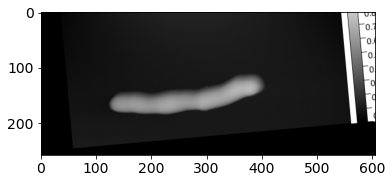

In [19]:
plt.imshow(aligned_list[3])

(array([349032.,   7098.,   4272.,   4410.,   6297.,  11076.,   5637.,
          1272.,    855.,   1695.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

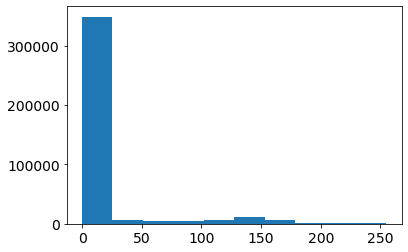

In [14]:
plt.hist(np.ravel(aligned_list[0][:,:-100,:]))

In [20]:
out = cv2.VideoWriter(date + '.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

for i in range(len(aligned_list)):
    out.write(aligned_list[i])
out.release()